<a href="https://colab.research.google.com/github/BenjaminEngel919/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction** **of** **Product** **Sales**



> **Benjamin** **Engel**





##Project Overview

##Load and Inspect Data

In [1]:
## Import and mount drive from Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Pandas

In [2]:
## Pandas
import pandas as pd

Loading Data

In [3]:
## Define the file address as a string
sales_df = "/content/drive/MyDrive/sales_predictions.csv"
sales_predictions = pd.read_csv(sales_df)

Previewing Dataframe info and first few rows.

In [4]:
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Dataframe Information

In [5]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

# **Tasks Addressed in following code**

1) How many rows and columns?

2) What are the datatypes of each variable?

3) Are there duplicates? If so, drop any duplicates.

4) Identify missing values.

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

6) Confirm that there are no missing values after addressing them.

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

**1)How many rows and Columns?**

In [6]:
##1 -How many rows and columns?
sales_predictions.shape
print(f'There are {sales_predictions.shape[0]} rows, and {sales_predictions.shape[1]} columns.')

There are 8523 rows, and 12 columns.


**2) What are the datatypes of each variable?**

In [7]:
##2 -What are the datatypes of each variable?
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**3) Any duplicates?**

In [8]:
##3Any duplicates? If yes, drop them.
print(f'There are {sales_predictions.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


**4) Identify missing values.**

In [9]:
##4 Identify missing values.
print(f'There are {sales_predictions.isna().sum().sum()} missing values.')

There are 3873 missing values.


In [10]:
print(sales_predictions.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


**5) Decide on how to address the missing values.**

In [11]:
##5 Decide on how to address the missing values.
print(sales_predictions.isna().sum()/len(sales_predictions)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


Item_Weight is missing 17% and Outlet_Size is missing 28% I will replace weight with the median of that column. I will replace the outlet type with unknown. This is the best way to not create bias.

In [12]:
## Define the median value of the column
median_item_weight = sales_predictions['Item_Weight'].median()

In [13]:
## Replace the missing values with the column's 'median' value
sales_predictions['Item_Weight'].fillna(value = median_item_weight, inplace = True)

In [14]:
sales_predictions.fillna(value = 'Unknown', inplace=True)

**6) Confirm there are no missing values and address them!**

In [15]:
##6 Confirm there are no missing values and address them!
print(sales_predictions.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [16]:
##Verifying my replacments took place.
sales_predictions.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


**7) Find and fix any inconsistent catagories.**

In [17]:
##7 Find and fix any inconsistent catagories.

In [18]:
data_types = sales_predictions.dtypes
str_cols = data_types[ data_types=='object'].index
str_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
for col in str_cols:
  print(f'- {col}:')
  print(sales_predictions[col].value_counts(dropna=False))
  print("\n\n")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64



- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64



- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64



- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    9

Inconsistent values are present in Item fat content. Multiple ways to say the same thing in each. No consistent data form. Will use replace to normalize the values. Two values will remain, Low Fat and Regular.

In [20]:
# Display the unique values from the column
print(sales_predictions['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [21]:
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
## Method 2  - Use a Dictionary to replace value
sales_predictions.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'}, inplace = True)

In [23]:
## Displaying the new value totals
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**8) For any numerical colums, obtain the summary statistics of each.**

In [24]:
##8 For any numerical columns, obtain the summary statistics of each
sales_predictions.describe(include = 'number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


##Exploratory Data Analysis

In [25]:
## Pandas
import pandas as pd
## MatPlotlib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns
# MissingNo
import missingno as msno

## Filter ALL warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
# Checking info again
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
##Displayig the descriptive statistics for the Item Outlet Sales column
sales_predictions['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

This shows us Item Outlet Sales numerically. We'll use visual features of Python to be describe how Sales are distrubted.

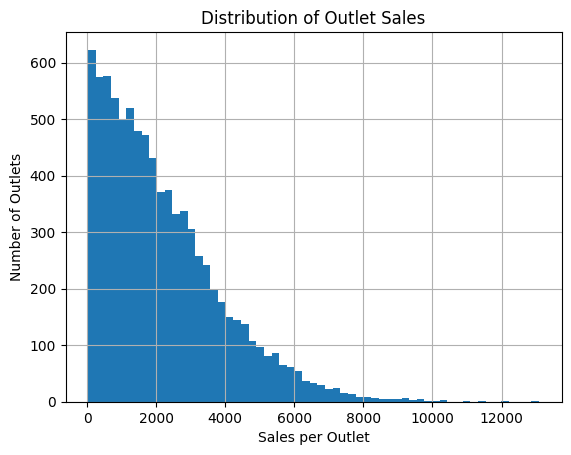

In [28]:
## Define a MatplotLib ax object using pandas' .hist()
## Bins = 'auto'
ax = sales_predictions['Item_Outlet_Sales'].hist(bins = 'auto')

## Set the Title
ax.set_title('Distribution of Outlet Sales')
## Set the X axis label
ax.set_xlabel('Sales per Outlet')
## Set the Y axis label
ax.set_ylabel('Number of Outlets');

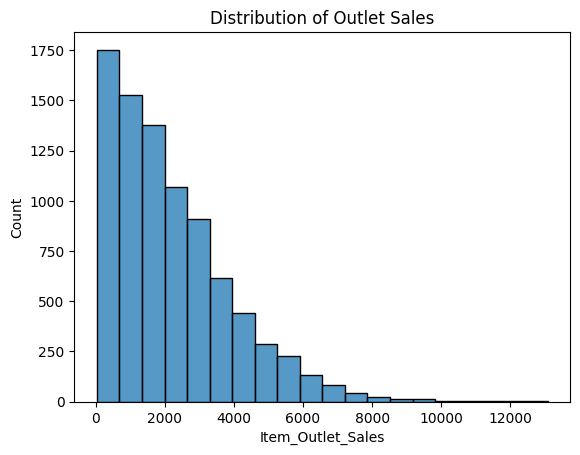

In [29]:
## Define a MatplotLib ax object using seaborn.histplot()
## Bins = 10
ax = sns.histplot(data=sales_predictions,
                  x='Item_Outlet_Sales',
                  bins=20)

## Set the Title
ax.set_title('Distribution of Outlet Sales');
## Note Seaborn automatically sets X and Y axis labels

These Histograms show that most sales figures are in the zero to $4000 range.Very few outlets have high sales. We'll use a box plot to visualize this even better.

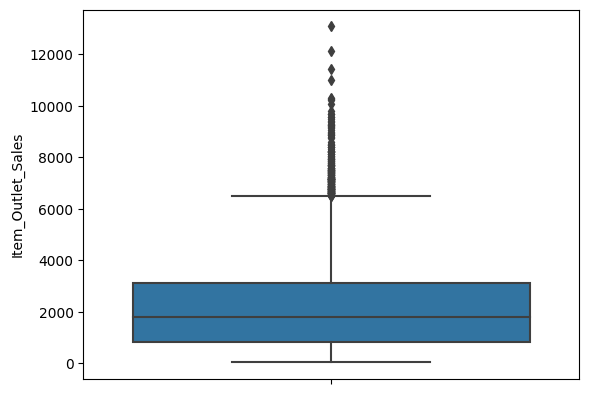

In [30]:
## Define a MatplotLib ax object using seaborn.boxplot()
## Use 'y=' for vertical
ax = sns.boxplot(y = 'Item_Outlet_Sales', data = sales_predictions)

This is better visualization that most of the Outlets make between 1k to 3k. With a mean of just under 2k. We have lots of Outlets that are overperforming greatly. Maybe we should see this by Outlet type. Let's do that.

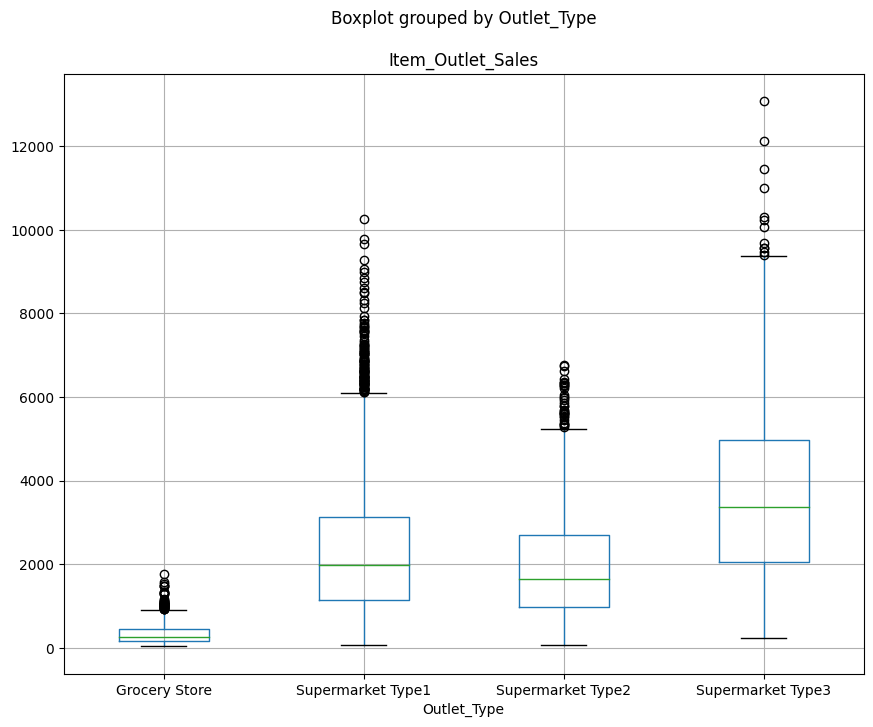

In [31]:
## Define a MatplotLib ax object using pandas' .boxplot()
## Use 'by=' to differentiate labels
ax = sales_predictions.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Type', figsize = (10,8))

Here we see that Grocery Stores are the poor performers. Barely selling except for the outliers of that type. All of the Supermarkets average at least 1750 average sales. Supermarkets also have large amount of outliers. Big money Outlets. Super market 3 averaging approximately 3500 in sales and some very high performing stores. This could definitely help decide what to build going forward.

Finally let's see if we can find a correlation numerically within out dataset.

In [32]:
#Calculating Correlations
corr = sales_predictions.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


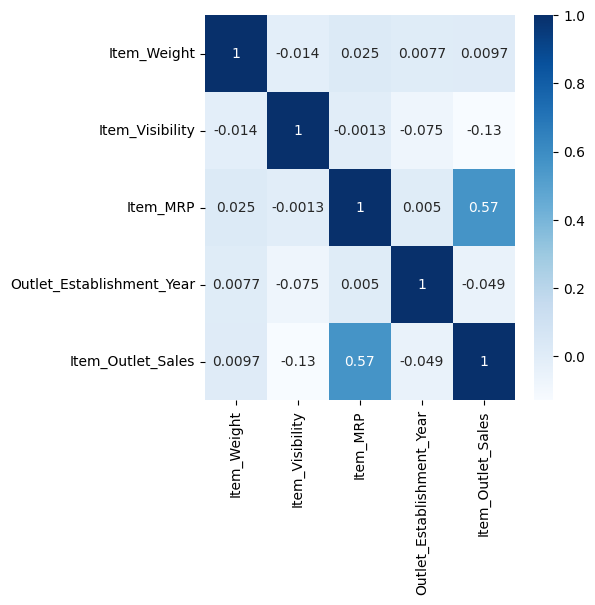

In [33]:
# Define MatplotLib fig and ax objects using plt.subplots()
# Use figsize= to set thesize of the figure
fig, ax = plt.subplots(figsize = (5, 5))

# Define a MatplotLib ax object using sns.heatmap()
# Use cmap= to define the color map
# USe annot= to annotate the correlation values
ax = sns.heatmap(corr, cmap= 'Blues', annot = True);

Based on this heatmap. The best correlation by far is that Item Outlet Sales positively increase when the Item MRP is also high. This definitely makes since, higher priced items equal higher total sales for the Outlets.

##Explanatory Data Analysis

In [58]:
#The Usual Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

In [42]:
## Updating rcParams  with the same font params that we used 
plt.rcParams.update( {'font.family':'serif',
                    'figure.figsize':[15,20],
                    'font.size':'15', #not all options for Text are options here
             'font.weight':'bold',
             'axes.titleweight': 'bold'})

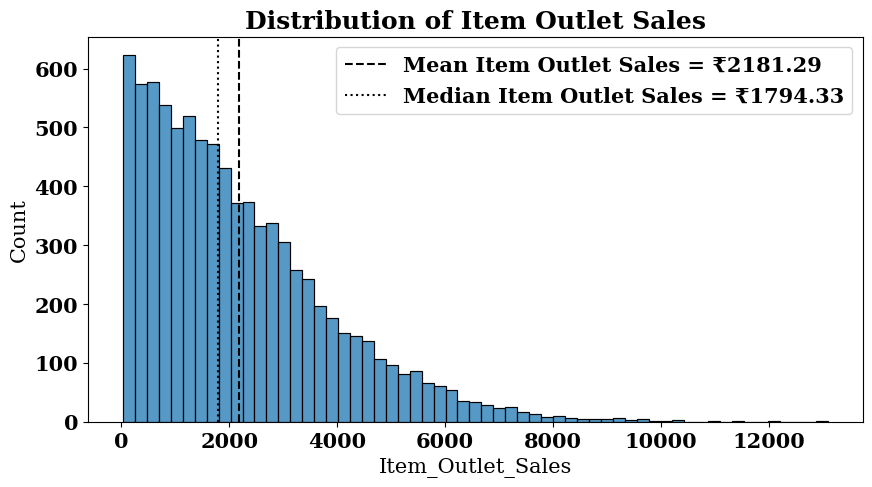

In [60]:
## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=sales_predictions, x='Item_Outlet_Sales', ax=ax)
ax.set(title='Distribution of Item Outlet Sales');

## Annotating mean and median
mean_price = sales_predictions['Item_Outlet_Sales'].mean()
ax.axvline(mean_price,color='k', ls='--', 
           label=f"Mean Item Outlet Sales = ₹{round(mean_price,2)}");

med_price = sales_predictions['Item_Outlet_Sales'].median()
ax.axvline(med_price,color='k', ls=':', 
           label=f"Median Item Outlet Sales = ₹{round(med_price,2)}");

ax.legend();

#**Discussion**

> **This visualization shows the same distribution as previous histograms but I added the Mean and Median Item Outlet Sales. This shows that the Mean is not skewed too much with the High preforming stores. It gives a good overall picture of Company production via sales.**







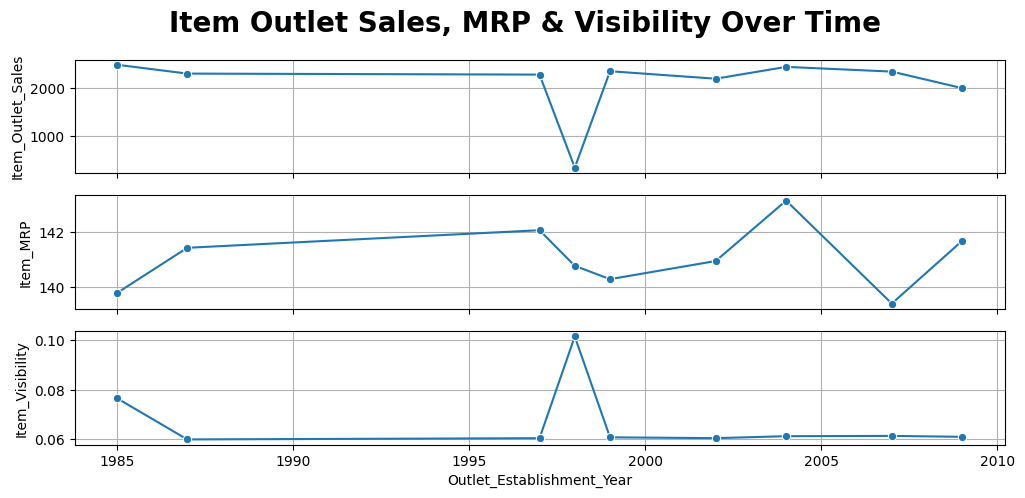

In [41]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, axes = plt.subplots(nrows = 3, figsize = (12,5), sharex = True)

sns.lineplot(data = sales_predictions, x = 'Outlet_Establishment_Year', y = 'Item_Outlet_Sales', errorbar = None, marker = 'o', ax = axes[0])
sns.lineplot(data = sales_predictions, x = 'Outlet_Establishment_Year', y = 'Item_MRP', errorbar = None, marker = 'o', ax = axes[1])
sns.lineplot(data = sales_predictions, x = 'Outlet_Establishment_Year', y = 'Item_Visibility', errorbar = None, marker = 'o', ax = axes[2])

# list comprehension
[ax.grid() for ax in axes]

## Set the Suptitle
fig.suptitle('Item Outlet Sales, MRP & Visibility Over Time', fontsize = 20, fontweight = 'bold');

In [44]:
plot_df = sales_predictions.groupby('Outlet_Establishment_Year').mean()

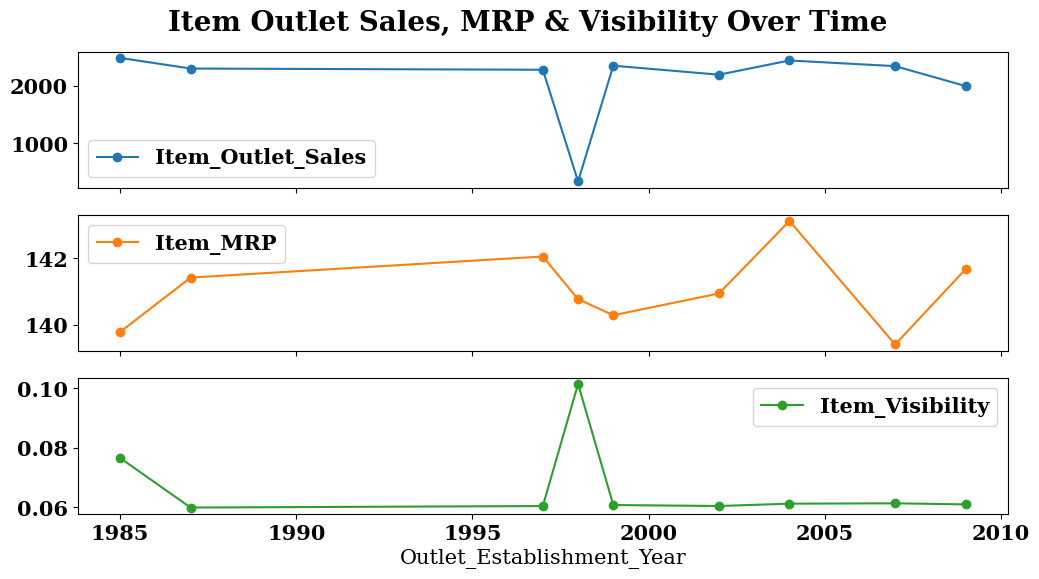

In [45]:
plot_df.plot(y=['Item_Outlet_Sales', 'Item_MRP', 'Item_Visibility'], subplots = True, marker = 'o', figsize = (12,6))

## Set the Suptitle
plt.suptitle('Item Outlet Sales, MRP & Visibility Over Time', fontsize = 20, fontweight = 'bold', y = .95);

#**Discussion**

> **These pair of three comparison lineplots shows something very interesting. Item Outlet sales and Item visibility are correlated almost perfectly. When the the Item Visibility *increased* the most the Item Outlet Sales *decreased* almost the same amount. This happened at the same moment in the timeline. This woiuld be very valueable for the shareholders and decision makers for the company.**



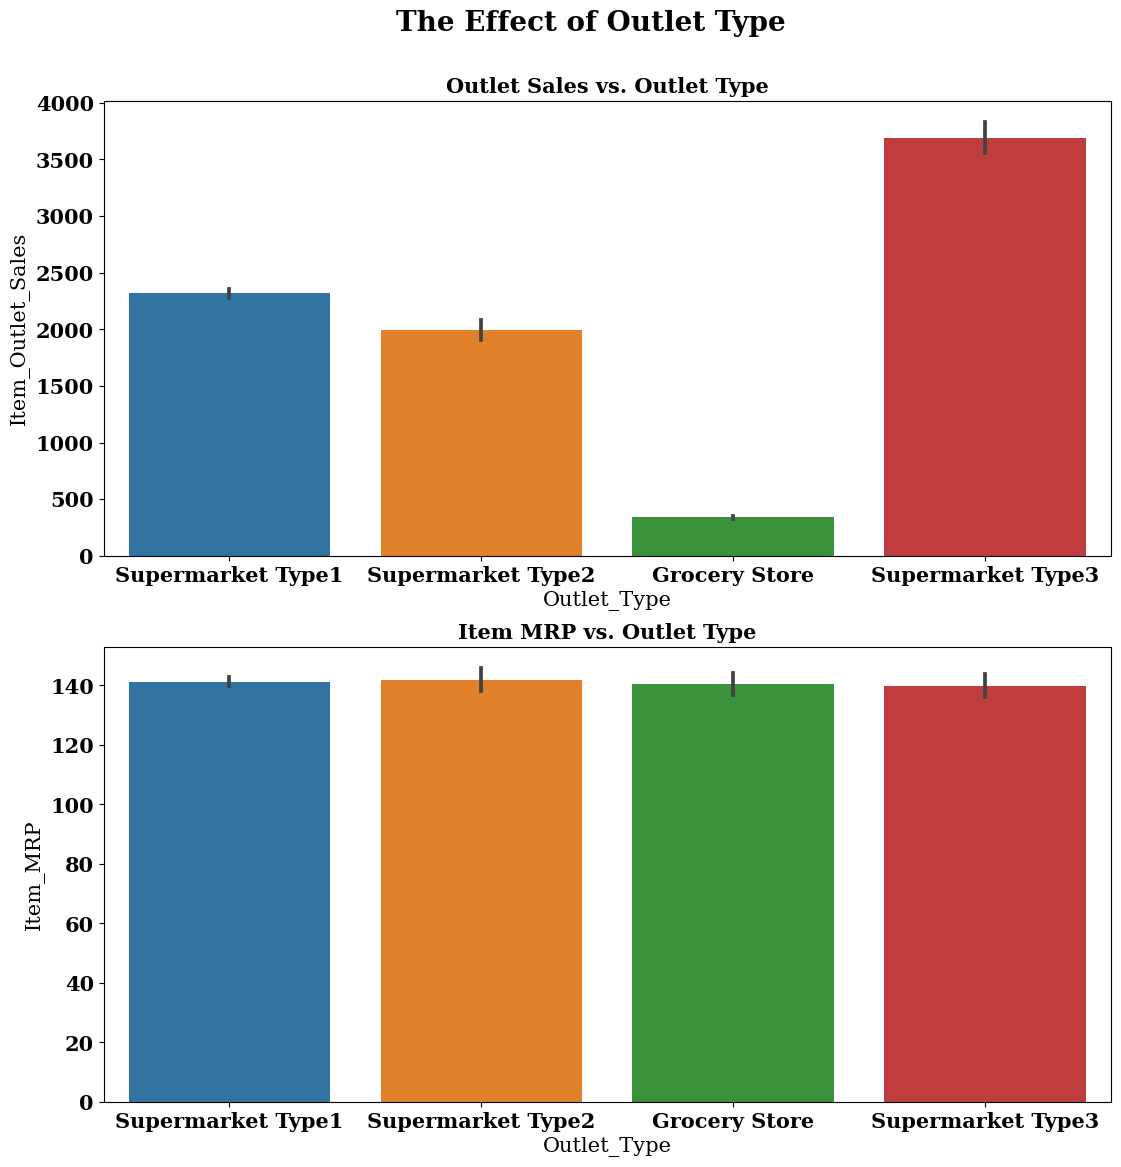

In [49]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, axes = plt.subplots(nrows = 2, figsize = (13, 13))

sns.barplot(data = sales_predictions, x = 'Outlet_Type', y = 'Item_Outlet_Sales', ax = axes[0])
## Set the Title
axes[0].set_title('Outlet Sales vs. Outlet Type', fontsize = 15, fontweight = 'bold')

sns.barplot(data = sales_predictions, x = 'Outlet_Type', y = 'Item_MRP', ax = axes[1])
## Set the Title
axes[1].set_title('Item MRP vs. Outlet Type', fontsize = 15, fontweight = 'bold')

## Set the Suptitle
fig.suptitle('The Effect of Outlet Type', fontsize = 20, fontweight = 'bold', y = .95);

#**Discussion**

> **Our final pair of Barplots tell a story that might be the best one yet. This compares Item Outlet Sales and MRP. This shows that all four Outlet types have the virtually same Item MRP but NOT the same sales. In fact Supermark Type3 has the lowest MRP by a small margin. Yet Supermarket Type3 has the largest Item Outlet Sales by far, almost doubling the runner up. This would show the shareholders which Outlet type they should consider building next. I would definitely choose Supermarket Type3.**

